# Imports

In [156]:
import pandas as pd; import seaborn as sb; import statsmodels.formula.api as smf; import pingouin;
from statannot import add_stat_annotation; from itertools import combinations; import os
from analysis_helpers import *



import warnings
warnings.filterwarnings('ignore')

# Load Data

In [157]:
merged = pd.DataFrame.from_csv('gaze_coords_with_ratings.csv')
eye_behav_full = pd.DataFrame.from_csv('eye_behav_full.csv')
eye_behav = pd.DataFrame.from_csv('eye_behav.csv')
total = pd.DataFrame.from_csv('data_with_correct_scaled_gaze.csv')

In [158]:
# eye_behav_full[eye_behav_full[eye_behav_full['Trial Type']=='Presentation']['Subject']==8.0]['Trial']

In [159]:
def eye_read(dir, out_str):
    '''
    input:  directory with gaze data
    output: gaze df, also saves pickle
    '''
    # "/Users/kirstenziman/Documents/attention-memory-task/data/"
    all_gaze = []

    for b in os.listdir(dir):
        print(b)
        dr = dir+b
        initial = eye_intial( dr + "/eye_data/")
        pres = pres_gaze_image(dr, initial, b[0:2])
        subject_gaze = pd.concat([pd.concat(pres[x]) for x in pres.keys()])
        all_gaze.append(subject_gaze)

    df = pd.concat(all_gaze)
    eye_df = df

    # convert to centimeters
    df['av_x_coord'] = (59.8/2048)*(df[['xRaw_righteye', 'xRaw_lefteye']].mean(axis=1))
    df['av_y_coord'] = (33.6/1152)*(df[['yRaw_righteye', 'yRaw_lefteye']].mean(axis=1))
    # "/Users/kirstenziman/Documents/attention-memory-task/gaze_May_update.pkl"
    pickle.dump(df, open(out_str, "wb" ))

    return(df)

class parseFile():
    def __init__(self, file):
        self.file = file
    def parse(self):
        data = open(self.file).read()
        return(data)

def load(path):
    '''
    input: path to directory containing eye track data
    output: raw parsed eye data
    '''

    data = []
    files = [f for f in os.listdir(path)]

    for x in files:
        #if os.path.isfile(path+x):
        newFile = parseFile(path+x)
        data1 = newFile.parse()

        for a,b in zip(['true','false'], ['True', 'False']):
            data1 = data1.replace(a, b)

        data1 = data1.split('\n')
        data1 = [x for x in data1 if "tracker" in x]
        data.extend(data1)

    return(data)

In [160]:
# def eye_intial(path):
#     ''' reads in raw eye gaze data
#         outputs eye gaze dataframe, timestamps in GMT
#     '''

#     data = []

#     for x in os.listdir(path):
#         newFile = parseFile(path+x)
#         data1 = newFile.parse()

#         for a,b in zip(['true','false'], ['True', 'False']):
#             data1 = data1.replace(a, b)

#         data1 = data1.split('\n')
#         data1 = [x for x in data1 if "tracker" in x]
#         data.extend(data1)

#     dict_list = [as.literal_eval(x) for x in data]
#     dict_list = [x['values']['frame'] for x in dict_list if 'values' in x and 'frame' in x['values']]
#     df = pd.DataFrame(dict_list)

#     for eye in ['righteye','lefteye']:
#         for coord in ['x','y']:
#             df[coord+'Raw_'+eye] = [df[eye][row]['raw'][coord] for row in df.index.values]

#     df['av_x_coord'] = df[['xRaw_righteye', 'xRaw_lefteye']].mean(axis=1)
#     df['av_y_coord'] = df[['yRaw_righteye', 'yRaw_lefteye']].mean(axis=1)
#     df['timestamp']=[time.mktime(time.strptime(x[:], "%Y-%m-%d %H:%M:%S.%f")) for x in df['timestamp']]

#     return(df)

In [161]:
#eye_data = eye_read('/Users/kirstenziman/Documents/github/attention-memory-task/data/','eye_data_exp1_actual.pkl')

In [162]:
min(eye_behav['av_x_coord'])

8.675401782226562

In [164]:
eye_data_exp1.groupby(['Subject']).mean()

,fix,state,time,timestamp,xRaw_righteye,yRaw_righteye,xRaw_lefteye,yRaw_lefteye,av_x_coord,av_y_coord,Trial
Subject,,,,,,,,,,,
0,0.942109,7.0,2.883470e+08,1.550772e+09,1004.895786,559.347447,1037.741528,560.289662,29.821707,16.328041,4.685964
1,0.888521,7.0,2.930932e+08,1.550776e+09,1043.876227,578.223412,1021.832229,585.442027,30.158537,16.970121,4.717986
10,0.974076,7.0,7.289817e+06,1.553712e+09,1020.957462,549.610998,1015.250656,580.469039,29.727843,16.480334,4.525035
12,0.747376,7.0,1.113139e+07,1.553716e+09,1037.393494,571.437338,1028.375214,586.584205,30.159416,16.887814,4.470263
13,0.413506,7.0,1.744972e+08,1.553879e+09,1102.382760,663.324879,1006.603143,664.546098,30.790370,19.364785,4.446809
14,0.938305,7.0,1.798475e+08,1.553884e+09,1036.665781,587.528043,1010.255927,608.648217,29.884257,17.444237,4.417119
15,0.729792,7.0,4.250268e+08,1.554129e+09,992.586143,595.636318,984.821170,538.645377,28.869374,16.541608,4.256089
16,0.936090,7.0,4.319496e+08,1.554136e+09,993.666019,579.464465,1009.841475,566.599084,29.250427,16.713427,4.494426
17,0.969013,7.0,4.388906e+08,1.554143e+09,1008.342537,562.111980,1029.788255,551.358556,29.755913,16.238112,4.512156


In [165]:
with open('eye_data_exp1.pkl','rb') as fp:
    eye_data_exp1 = pickle.load(fp)
    
eye_data_exp1 = eye_data_exp1[eye_data_exp1['av_x_coord']<59.8]
eye_data_exp1['Subject'] = eye_data_exp1['Subject'].map(lambda x: x.replace('_',''))

In [166]:
eye_data_exp1.groupby(['Subject']).mean()

,fix,state,time,timestamp,xRaw_righteye,yRaw_righteye,xRaw_lefteye,yRaw_lefteye,av_x_coord,av_y_coord,Trial
Subject,,,,,,,,,,,
0,0.942109,7.0,2.883470e+08,1.550772e+09,1004.895786,559.347447,1037.741528,560.289662,29.821707,16.328041,4.685964
1,0.888521,7.0,2.930932e+08,1.550776e+09,1043.876227,578.223412,1021.832229,585.442027,30.158537,16.970121,4.717986
10,0.974076,7.0,7.289817e+06,1.553712e+09,1020.957462,549.610998,1015.250656,580.469039,29.727843,16.480334,4.525035
12,0.747376,7.0,1.113139e+07,1.553716e+09,1037.393494,571.437338,1028.375214,586.584205,30.159416,16.887814,4.470263
13,0.413506,7.0,1.744972e+08,1.553879e+09,1102.382760,663.324879,1006.603143,664.546098,30.790370,19.364785,4.446809
14,0.938305,7.0,1.798475e+08,1.553884e+09,1036.665781,587.528043,1010.255927,608.648217,29.884257,17.444237,4.417119
15,0.729792,7.0,4.250268e+08,1.554129e+09,992.586143,595.636318,984.821170,538.645377,28.869374,16.541608,4.256089
16,0.936090,7.0,4.319496e+08,1.554136e+09,993.666019,579.464465,1009.841475,566.599084,29.250427,16.713427,4.494426
17,0.969013,7.0,4.388906e+08,1.554143e+09,1008.342537,562.111980,1029.788255,551.358556,29.755913,16.238112,4.512156


In [167]:
max(eye_data_exp1.groupby(['Subject','Run','Trial'], as_index=False).mean()['av_x_coord'])

39.622601329706754

In [168]:
tr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]*8*30
df_list['Trial']=np.nan
df_list.loc[df_list['Trial Type']=='Presentation','Trial']=tr
df_list.head()

NameError: name 'df_list' is not defined

In [169]:
grouped_eye = eye_data_exp1.groupby(['Subject','Run','Trial'], as_index=False).mean()

grouped_eye['Subject'] = pd.to_numeric(grouped_eye['Subject'])
grouped_eye['Run']     = pd.to_numeric(grouped_eye['Run'])
grouped_eye['Trial']   = pd.to_numeric(grouped_eye['Trial'])


merged_pres = grouped_eye.merge(df_list, on=['Subject', 'Run', 'Trial'])

NameError: name 'df_list' is not defined

In [170]:
def add_gaze(df):
    '''
    input: df containing pres and mem from single run
    output: df with string in 'Attention Level' column in each Memory trial row
    '''

    for index,row in df.iterrows():
        if row['Trial Type']=='Memory':
            mem_image = row['Memory Image']
            for cue in ['Cued ', 'Uncued ']:
                for cat in ['Face', 'Place']:
                    if df.loc[df[cue+cat] == mem_image].shape[0]!=0:
                        df['av_x_coord'][index]=df.loc[df[cue+cat] == mem_image]['av_x_coord']  
                        df['Cued Side'][index] = df.loc[df[cue+cat] == mem_image]['Cued Side'].item()  

    mem_mask = df['Trial Type']=='Memory'
    df.loc[mem_mask,'av_x_coord'] = df.loc[mem_mask,'av_x_coord'].fillna(np.nan)

    return(df)

In [171]:
combine = pd.concat([merged_pres, df_list[df_list['Trial Type']=='Memory']])

NameError: name 'merged_pres' is not defined

In [172]:
subs = []

for sub in combine['Subject'].unique():
    print(sub)
    name_str = 'subject_' + str(sub)
    subs.append(add_gaze(combine[combine['Subject']==sub]))
    pickle.dump(sub, open(name_str, "wb" ))
    
pickle.dump(subs, open("subs_real1.p", "wb" ))

NameError: name 'combine' is not defined

# Add Gaze Function

In [126]:
#def add_gaze(df):
def add_side(df):
    '''
    input: df containing pres and mem from single run
    output: df with string in 'Attention Level' column in each Memory trial row
    '''

    for index,row in df.iterrows():
        if row['Trial Type']=='Memory':
            mem_image = row['Memory Image']
            for cue in ['Cued ', 'Uncued ']:
                for cat in ['Face', 'Place']:
                    if df.loc[df[cue+cat] == mem_image].shape[0]!=0:
                        df['av_x_coord'][index]=df.loc[df[cue+cat] == mem_image]['av_x_coord']  
                        df['Cued Side'][index] = df.loc[df[cue+cat] == mem_image]['Cued Side'].item()  

    mem_mask = df['Trial Type']=='Memory'
    df.loc[mem_mask,'av_x_coord'] = df.loc[mem_mask,'av_x_coord'].fillna(np.nan)

    return(df)

In [ ]:
missing_sub = add_side(eye_behav_full[eye_behav_full['Subject']==327])

In [127]:
# total=[]

# for s in full['Subject'].unique():
#     print(s)
    
#     for r in full['Run'].unique():
#         #print(r)
        
#         total.append(add_side(full[(full['Subject']==s) & (full['Run']==r)]))

In [128]:
# total = pd.concat(total)

In [129]:
#total['Cued Side']

In [130]:
# total['Subject'].unique()
# df['Cued Side'][index] = df.loc[df[cue+cat] == mem_image]['Cued Side']

In [208]:
# everything on the right is okay

# everything on the left nees a switch

total.loc[total['Cued Side']=='<','scaled_x_coord'] = abs(total[total['Cued Side']=='<']['scaled_x_coord'])
total.loc[total['Attention Level']=='Category','scaled_x_coord'] = -total[total['Attention Level']=='Category']['scaled_x_coord']
total.loc[total['Attention Level']=='None','scaled_x_coord'] = -total[total['Attention Level']=='None']['scaled_x_coord']

In [209]:
total = pd.DataFrame.from_csv('data_with_correct_scaled_gaze.csv')

In [210]:
total.groupby(['Subject']).mean()

,Attention Button,Attention Reaction Time (s),Cue Validity,Familiarity Rating,Familiarity Reaction Time (s),Post Invalid Cue,Pre Invalid Cue,Rating History,Run,Stimulus End,...,fix,state,time,timestamp,xRaw_lefteye,xRaw_righteye,yRaw_lefteye,yRaw_righteye,FamiliarityRating,scaled_x_coord
Subject,,,,,,,,,,,,,,,,,,,,,
0.0,1.937500,0.717281,0.921875,2.278689,1.157703,NaN,NaN,NaN,3.536458,1.550772e+09,...,0.940597,7.0,2.883481e+08,1.550772e+09,1037.825080,1004.886601,560.125274,559.367250,2.278689,0.001500
1.0,2.079365,0.869768,0.904762,1.936508,0.983322,NaN,NaN,NaN,3.582245,1.550776e+09,...,0.881280,7.0,2.930162e+08,1.550776e+09,1022.522152,1044.277871,580.871161,576.491001,1.936508,0.005420
2.0,2.088608,0.962702,0.898734,2.639073,1.214912,NaN,NaN,NaN,3.503759,1.550780e+09,...,0.294264,7.0,2.970078e+08,1.550780e+09,986.482024,1143.709013,682.226317,635.970697,2.639073,0.023041
3.0,1.925000,1.330014,0.900000,1.732258,1.087862,NaN,NaN,NaN,3.500000,1.550784e+09,...,0.799681,7.0,3.009017e+08,1.550784e+09,1032.876780,1030.524543,598.826106,636.258214,1.732258,0.005028
4.0,2.000000,0.830911,0.900000,1.941558,1.364484,NaN,NaN,NaN,3.500000,1.550789e+09,...,0.938248,7.0,3.055987e+08,1.550789e+09,1030.306839,1015.602977,497.729289,496.242719,1.941558,0.002728
5.0,1.938776,0.792175,0.938776,2.311111,0.922209,NaN,NaN,NaN,3.357724,1.551195e+09,...,0.804058,7.0,7.117328e+08,1.551195e+09,1064.053134,1029.923538,533.176240,551.137782,2.311111,0.025941
7.0,1.962025,1.331865,0.898734,1.760383,1.263963,NaN,NaN,NaN,3.506266,1.551372e+09,...,0.898381,7.0,8.888161e+08,1.551372e+09,1022.484650,1039.941641,587.764606,580.103705,1.760383,0.004613
8.0,2.075000,1.112449,0.900000,2.003195,1.240581,NaN,NaN,NaN,3.500000,1.551381e+09,...,0.754131,7.0,8.978821e+08,1.551381e+09,980.556440,1164.942351,719.848038,727.752061,2.003195,0.020241
10.0,2.000000,0.902189,0.900000,1.741214,1.344647,NaN,NaN,NaN,3.461538,1.553711e+09,...,0.966525,7.0,6.873278e+06,1.553711e+09,1005.371077,1026.896073,595.138714,576.983837,1.741214,0.005160


In [211]:
total_g = total.groupby(['Subject','Attention Level', 'Familiarity Rating'],as_index=False).mean()
total_g.head()

,Subject,Attention Level,Familiarity Rating,Attention Button,Attention Reaction Time (s),Cue Validity,Familiarity Reaction Time (s),Post Invalid Cue,Pre Invalid Cue,Rating History,...,fix,state,time,timestamp,xRaw_lefteye,xRaw_righteye,yRaw_lefteye,yRaw_righteye,FamiliarityRating,scaled_x_coord
0,0.0,Category,1.0,NaN,NaN,NaN,1.103636,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.009935
1,0.0,Category,2.0,NaN,NaN,NaN,1.613727,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,-0.013504
2,0.0,Category,3.0,NaN,NaN,NaN,1.487000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-0.021296
3,0.0,Category,4.0,NaN,NaN,NaN,1.250833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,-0.003771
4,0.0,Full,1.0,NaN,NaN,NaN,1.227889,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.006154


In [212]:
len(total_g['Subject'].unique())

30

In [213]:
total_g.groupby(['Subject']).mean()

,Familiarity Rating,Attention Button,Attention Reaction Time (s),Cue Validity,Familiarity Reaction Time (s),Post Invalid Cue,Pre Invalid Cue,Rating History,Run,Stimulus End,...,fix,state,time,timestamp,xRaw_lefteye,xRaw_righteye,yRaw_lefteye,yRaw_righteye,FamiliarityRating,scaled_x_coord
Subject,,,,,,,,,,,,,,,,,,,,,
0.0,2.500000,NaN,NaN,NaN,1.234163,NaN,NaN,NaN,3.410433,1.550772e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,0.000371
1.0,2.500000,NaN,NaN,NaN,1.054579,NaN,NaN,NaN,3.541206,1.550776e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,-0.000437
2.0,2.500000,NaN,NaN,NaN,1.294849,NaN,NaN,NaN,3.652931,1.550780e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,0.002518
3.0,2.333333,NaN,NaN,NaN,1.181996,NaN,NaN,NaN,3.574661,1.550784e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.333333,0.000106
4.0,2.333333,NaN,NaN,NaN,1.373181,NaN,NaN,NaN,3.573723,1.550789e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.333333,0.000284
5.0,2.421053,NaN,NaN,NaN,0.950156,NaN,NaN,NaN,3.682151,1.551195e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.421053,0.002425
7.0,2.500000,NaN,NaN,NaN,1.335011,NaN,NaN,NaN,3.033683,1.551372e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,-0.000617
8.0,2.500000,NaN,NaN,NaN,1.214794,NaN,NaN,NaN,3.212975,1.551381e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,-0.011370
10.0,2.500000,NaN,NaN,NaN,1.466941,NaN,NaN,NaN,2.993359,1.553711e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,-0.003702


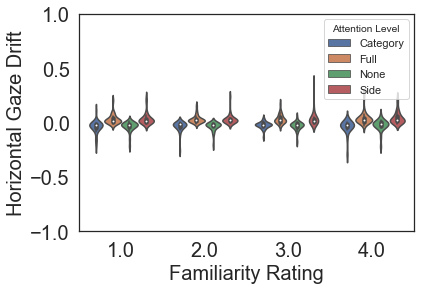

In [214]:
sb.set_style('white')


sb.set_style('white')


f = sb.violinplot(x='Familiarity Rating', y='scaled_x_coord', 
              data=total_g[total_g['Attention Level']!='Novel'], hue='Attention Level')

plt.grid(False)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Familiarity Rating',    fontsize = 20)
plt.ylabel('Horizontal Gaze Drift', fontsize = 20)
f.set(ylim=(-1, 1))
plt.savefig('av_x_gaze_exp2_mixy.pdf')




In [215]:
total_g['Subject'].unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  33.,  34., 327.])

In [216]:
anova_dat = total_g.groupby(['Attention Level','Familiarity Rating','Subject'],as_index=False).mean()

In [217]:
pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level', 'scaled_x_coord'], subject='Subject', 
                  data=anova_dat[anova_dat['Attention Level']!='Novel'])

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Attention Level,88.042,3,81,29.347,1.811,0.15162,0.165856,0.063,0.779
1,scaled_x_coord,57938.502,421,11367,137.621,-27.768,1.00000,NaN,36.143,NaN
2,Attention Level * scaled_x_coord,-43541.919,1263,34101,-34.475,-28.964,1.00000,NaN,14.749,NaN


## Mean stat for paper

In [218]:
import scipy
import numpy as np

total_g_group = total.groupby(['Subject'],as_index=False).mean()

scipy.stats.ttest_1samp(list(total_g_group['scaled_x_coord'][0:28]), 0)

Ttest_1sampResult(statistic=4.485455143831787, pvalue=0.00012132970174996966)

In [223]:
total_g_group['scaled_x_coord']

0     0.001500
1     0.005420
2     0.023041
3     0.005028
4     0.002728
5     0.025941
6     0.004613
7     0.020241
8     0.005160
9     0.005353
10    0.029703
11    0.006336
12    0.004362
13    0.000872
14    0.005507
15    0.022820
16    0.006516
17    0.007970
18    0.005063
19    0.066071
20    0.003203
21    0.032997
22    0.007942
23    0.008410
24    0.010331
25    0.002239
26    0.006346
27    0.005146
28    0.006610
29         NaN
Name: scaled_x_coord, dtype: float64

# Regression

In [189]:
total.loc[total['Attention Level']=='Novel','scaled_x_coord']=0
#total[total['Attention Level']=='Novel']['scaled_x_coord']

In [190]:
total['FamiliarityRating'] = total['Familiarity Rating']
d = []

for subject in total['Subject'].unique(): 
    print(subject)
    
    sub  = []
    data = total[(total['Subject']==subject) & (total['Trial Type']=='Memory') ]
    reg  = smf.ols(formula = "FamiliarityRating ~ scaled_x_coord", data = data).fit()
    data = data.reset_index()
    d.append(pd.concat([data, pd.DataFrame({'gaze_resid':reg.resid})], axis=1, sort=False))
    
gaze_reg = pd.concat(d)

8.0
15.0
1.0
25.0
12.0
4.0
28.0
19.0
21.0
33.0
7.0
26.0
14.0
2.0
16.0
27.0
23.0
18.0
29.0
13.0
5.0
24.0
0.0
34.0
22.0
17.0
3.0
10.0
20.0
327.0


In [191]:
# total['FamiliarityRating'] = total['Familiarity Rating']
# d=[]

# for subject in total['Subject'].unique(): 
#     sub=[]
#     data = total[total['Subject']==subject]
#     reg = smf.ols(formula = "FamiliarityRating ~ scaled_x_coord", data = data).fit()
#     data = data.reset_index()
#     d.append(pd.concat([data, pd.DataFrame({'gaze_resid':reg.resid})], axis=1, sort=False))
    
# gaze_reg = pd.concat(d)

In [192]:
#missing_sub = add_side(eye_behav_full[eye_behav_full['Subject']==327])

# Load Data

In [193]:
full = pd.DataFrame.from_csv('av_x_coord_in_mem_trials.csv')

In [205]:
total = pd.concat([total[total['Subject']!=327], missing_sub])

In [207]:
total.groupby(['Subject']).mean()

,Attention Button,Attention Reaction Time (s),Cue Validity,Familiarity Rating,Familiarity Reaction Time (s),FamiliarityRating,Post Invalid Cue,Pre Invalid Cue,Rating History,Run,...,av_y_coord,fix,scaled_x_coord,state,time,timestamp,xRaw_lefteye,xRaw_righteye,yRaw_lefteye,yRaw_righteye
Subject,,,,,,,,,,,,,,,,,,,,,
0.0,1.937500,0.717281,0.921875,2.278689,1.157703,2.278689,NaN,NaN,NaN,3.536458,...,16.325933,0.940597,0.000818,7.0,2.883481e+08,1.550772e+09,1037.825080,1004.886601,560.125274,559.367250
1.0,2.079365,0.869768,0.904762,1.936508,0.983322,1.936508,NaN,NaN,NaN,3.582245,...,16.878198,0.881280,0.002935,7.0,2.930162e+08,1.550776e+09,1022.522152,1044.277871,580.871161,576.491001
2.0,2.088608,0.962702,0.898734,2.639073,1.214912,2.639073,NaN,NaN,NaN,3.503759,...,19.223706,0.294264,0.013801,7.0,2.970078e+08,1.550780e+09,986.482024,1143.709013,682.226317,635.970697
3.0,1.925000,1.330014,0.900000,1.732258,1.087862,1.732258,NaN,NaN,NaN,3.500000,...,18.011646,0.799681,0.003017,7.0,3.009017e+08,1.550784e+09,1032.876780,1030.524543,598.826106,636.258214
4.0,2.000000,0.830911,0.900000,1.941558,1.364484,1.941558,NaN,NaN,NaN,3.500000,...,14.495425,0.938248,0.001637,7.0,3.055987e+08,1.550789e+09,1030.306839,1015.602977,497.729289,496.242719
5.0,1.938776,0.792175,0.938776,2.311111,0.922209,2.311111,NaN,NaN,NaN,3.357724,...,15.812913,0.804058,0.012509,7.0,7.117328e+08,1.551195e+09,1064.053134,1029.923538,533.176240,551.137782
7.0,1.962025,1.331865,0.898734,1.760383,1.263963,1.760383,NaN,NaN,NaN,3.506266,...,17.031413,0.898381,0.002745,7.0,8.888161e+08,1.551372e+09,1022.484650,1039.941641,587.764606,580.103705
8.0,2.075000,1.112449,0.900000,2.003195,1.240581,2.003195,NaN,NaN,NaN,3.500000,...,21.110835,0.754131,0.012144,7.0,8.978821e+08,1.551381e+09,980.556440,1164.942351,719.848038,727.752061
10.0,2.000000,0.902189,0.900000,1.741214,1.344647,1.741214,NaN,NaN,NaN,3.461538,...,17.093454,0.966525,0.002929,7.0,6.873278e+06,1.553711e+09,1005.371077,1026.896073,595.138714,576.983837


In [111]:
# full['scaled_x_coord'] = (full['av_x_coord'] - (59.8/2))/(59.8/2)

In [112]:
for sub in full['Subject'].unique():
    
    for r in full['Run'].unique():
        
        dat = full[(full['Subject']==s) & full[(full['Run']==r)]]
        mem_dat  = dat[dat['Trial Type']=='Memory']
        pres_dat = dat[dat['Trial Type']=='Presentation']
        
        for row in mem_dat.iterrows():
            
             
             
             
             
    # for every memory image

    # look at cued side during presentation
    
    
    
    # if cued side == '<' 
    #       if av_x_coord < 0
    #           if attn level Full or SIde --> abs val (x coord)
    #.      if av_x_coord > 0
    #.          if attn level Cat or None --> 

SyntaxError: unexpected EOF while parsing (<ipython-input-112-84ff75edd88d>, line 25)

In [ ]:
# full['scaled_x_coord']

# Gaze ANOVA

In [ ]:
attn_group = full.groupby(['Subject','Attention Level'], as_index=False).mean()

In [ ]:
# ORGANIZE DATA
pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level', 'scaled_x_coord'], subject='Subject', 
                  data=attn_group[attn_group['Attention Level']!='Novel'])

In [ ]:
attn_group.head()

In [ ]:
pingouin.rm_anova(dv='Adjusted', within=['Attention Level'], subject='Subject', data=reg_attn_group)

## Gaze Regression - issue: what is wrong with last subject ??

### obtain residuals

In [ ]:
# full[full['Subject']==327]

In [ ]:
full['Subject'].unique()#[0:-1]

full=total

In [ ]:
full['FamiliarityRating'] = full['Familiarity Rating']
d=[]

for subject in full['Subject'].unique()[:-1]: 
    sub=[]
    data = full[full['Subject']==subject]
    reg = smf.ols(formula = "FamiliarityRating ~ scaled_x_coord", data = data).fit()
    data = data.reset_index()
    d.append(pd.concat([data, pd.DataFrame({'gaze_resid':reg.resid})], axis=1, sort=False))
    
gaze_reg = pd.concat(d)

### subtract residuals, group data

In [ ]:
# gaze_reg['gaze_resid']

In [ ]:
gaze_reg['Adjusted'] = gaze_reg['Familiarity Rating']-gaze_reg['gaze_resid']

reg_attn_group = gaze_reg.groupby(['Subject','Attention Level'],as_index=False).mean()
reg_cat_group  = gaze_reg.groupby(['Subject','Attention Level','Category'],as_index=False).mean()
face  = reg_cat_group[reg_cat_group['Category']=='Face']
place = reg_cat_group[reg_cat_group['Category']=='Place']

## Plot Adjust Scores (Full)

### plot params

In [ ]:
x='Attention Level'; y='Adjusted'; order=['Full','Side','Category','None','Novel']

In [ ]:
# total.groupby(['Subject'],as_index=False).mean()['scaled_x_coord']

In [ ]:
l

In [ ]:
from itertools import combinations

ax = sb.violinplot(x=x, y=y, data=reg_attn_group, order=order)

pair = combinations(reg_attn_group['Attention Level'].unique(),2) 
l = [i for i in pair]


# ax = sb.barplot(x=x, y=y, data=data, order=['Full','Side','Category','None','Novel'])        

add_stat_annotation(ax, data=reg_attn_group, x=x, y=y, order=['Full','Side','Category','None','Novel'], 
                    boxPairList=l, test='t-test_paired', textFormat='star', loc='outside', verbose=2)

In [ ]:
reg_attn_group.groupby(['Attention Level']).mean()['Adjusted']

In [ ]:
pingouin.rm_anova(dv='Adjusted', within=['Attention Level'], subject='Subject', 
                  data=reg_attn_group[reg_attn_group['Attention Level']!='Novel'])

## Plot Adjusted Scores (Face)

In [ ]:
# from itertools import combinations
# from statannot import add_stat_annotation

# pair = combinations(groupy['Attention Level'].unique(),2) 
# l = [i for i in pair]

# ax = sb.barplot(x=x, y=y, data=data, order=['Full','Side','Category','None','Novel'])        

# add_stat_annotation(ax, data=face, x=x, y=y, order=['Full','Side','Category','None'], 
#                    boxPairList=l, test='t-test_paired', textFormat='star', loc='outside', verbose=2)

In [ ]:
sb.barplot(x=x, y=y, data=face, order=order)
plt.show()


## Plot Adjusted Scores (Place)

In [ ]:
sb.barplot(x=x, y=y, data=place, order=order)

In [ ]:
import scipy 

pair = combinations(groupy_face['Attention Level'].unique(),2) 
   
for i in list(pair): 
    print(i)
    p = scipy.stats.ttest_rel(groupy_face[groupy_face['Attention Level']==i[0]]['Adjusted'], 
                          groupy_face[groupy_face['Attention Level']==i[1]]['Adjusted'])
    print(p)
    print(' ')

In [ ]:
sb.barplot(x='Attention Level',y='Familiarity Rating', 
              data=groupy_face, order=['Full','Side','Category','None','Novel'])

In [ ]:
sb.barplot(x='Attention Level',y='Adjusted', 
              data=groupy_face, order=['Full','Side','Category','None','Novel'])

In [ ]:
sb.barplot(x='Attention Level',y='Familiarity Rating', order=['Full','Side','Category','Novel','None'],
              data=groupy_place)

In [ ]:
sb.barplot(x='Attention Level',y='Adjusted', 
              data=groupy_place, order=['Full','Side','Category','None','Novel'])

In [ ]:
sb.barplot(x='Attention Level',y='Adjusted', 
              data=groupy_face)

In [ ]:
pingouin.rm_anova(dv='Adjusted', within=['Attention Level'], subject='Subject', data=gaze_reg.groupby(['Subject','Attention Level'],as_index=False).mean())

In [ ]:
import scipy.stats as stats

data=gaze_reg.groupby(['Subject','Attention Level'],as_index=False).mean()

stats.ttest_rel(data[data['Attention Level']=='Category']['Adjusted'], 
                data[data['Attention Level']=='None']['Adjusted'])